### Scalar factor of the Universe

In [1]:
import numpy as np
from pylab import *
from scipy.integrate import odeint

In this notebook, we solve for the scale factor of the Universe based on the Standard Model of Cosmology, often called $\Lambda$CDM model. We take numerical values from the following:

[1] Lyth, D. H., & Liddle, A. R. (2009). The primordial density perturbation: Cosmology, inflation and the origin of structure. Cambridge University Press.

The Friedmann equation is given by
\begin{equation}
H(a)^2 = H_0^2 \left( \Omega_{r0} a^{-4} + \Omega_{m0} a^{-3} + \Omega_{\Lambda 0} \right)
\end{equation}
where $H$ is the Hubble parameter, and $\Omega_{r0}$, $\Omega_{m0}$, and $\Omega_{\Lambda 0}$ are the radiation, matter, and the vacuum (cosmological constant) energy densities, respectively, today. We refer to the following values tabulated in appendix B of Ref. [1]:
\begin{eqnarray}
\Omega_{r0} &=& 8.47 \times 10^{-5} \\
\Omega_{m0} &=& 0.276 \\
\Omega_{\Lambda 0} &=& 1 - \Omega_{r0} - \Omega_{m0} \\
H_0 &=& 70 \ \text{km} / \text{s} / \text{Mpc}  .
\end{eqnarray}

Noting that the Hubble parameter $H$ is related to the scale factor $a$ as
\begin{equation}
H = \frac{\dot{a}}{a}
\end{equation}
where an overdot denotes derivative with respect to the comoving time $t$, then the Friedmann equation can be written down as
\begin{equation}
\dot{a} = a H_0 \sqrt{\left( \Omega_{r0} a^{-4} + \Omega_{m0} a^{-3} + \Omega_{\Lambda 0} \right)} .
\end{equation}
This is the expression that we input into $odeint$. In the following code, we input this differential equation.

In [2]:
# here we setup the constants and the ode

omega_r = 8.47e-5
omega_m = 0.276
omega_vac = 1. - omega_r - omega_m
H_0 = 1. # rescaled to unity for efficient numerics

a_0 = 1. # initial condition on the scale factor today

def f(y, t):
    return y*H_0*np.sqrt( omega_r*(y**(-4.)) + omega_m*(y**(-3.)) + omega_vac )

time_points = np.linspace(1., 0.01, 100)

Note that by setting $H_0$ to unity, we work in units where time is measured in $H_0^{-1} \sim 14$ billion years. Also, we are integrating backwards in time, starting from the present.

With this said, we obtain the scale factor $a(t)$ of the Universe as follows.

C:\Users\Reggie Bernardo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


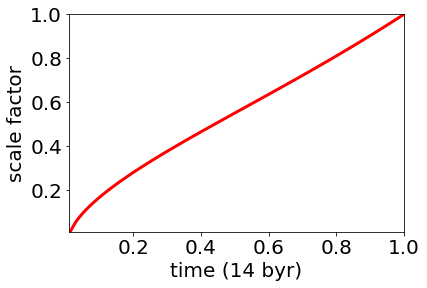

In [3]:
rc('xtick', labelsize = 20) # for the tick marks
rc('ytick', labelsize = 20)

a_lcdm = odeint(f, a_0, time_points) # odeint does its job

plot(time_points, a_lcdm, 'r-', linewidth = 3.0)
ylim(0.01, 1) # aesthetics
xlim(0.01, 1)
xlabel(r'time (14 byr)', fontsize = 20)
ylabel('scale factor', fontsize = 20)
show()

So, yeah. This is the scale factor $a(t)$ of the Universe. From this, one could think of the size of the universe as $V(t) \sim a(t)^3$.

The expansion history can be divided into three eras (1) radiation (2) matter and (3) dark energy era, depending on the Universe's energy content. The first era, which comes just right after the Big Bang and primordial inflation, is radiation domination, where $a(t) \sim t^{1/2}$. Then comes matter era, as radiation cools down much faster than matter, during which $a(t) \sim t^{2/3}$. Finally, and today, after both radiation and matter domination, comes dark energy era, where the Universe is dominated by an invisible, negative pressure fluid that sources the observed cosmic acceleration.